In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import soundfile as sf
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk

from IPython.display import Audio
from IPython.display import display

from ipywidgets import interactive, fixed
from myfilter import myFilter                 # thanks Petr Palka ! 

# for the moment, this will be obscure (desinging a filter in a way I need), see later for analysis and explanation ;) 
# filter that I want ... poles in +-0.9 exp(j pi/4), zeros in 1, j and -j ... 
wantedpoles = [0.9*np.exp(1j * np.pi/4), 0.9*np.exp(-1j * np.pi/4)]
wantedzeros = [1, 1j, -1j]
B = np.poly(wantedzeros)
A = np.poly(wantedpoles)
print(wantedpoles,"\n",wantedzeros)
print(B,"\n",A)

def plot_spectrogram(f, t, sgr, name='', vmin=-160, ax=None):
    # Transfer to PSD 
    sgr_log = 10 * np.log10(sgr + 1e-20)  # log(0) is undefined -> +1e-20 (add small value)

    if ax == None:
        fig = plt.figure(figsize=(20, 6))
        ax = fig.add_subplot(111)
    
    name = f'[{name}]' if name else '' 
    ax.set_title("Spectogram " + name, pad=10)
    ax.set_xlabel('$t\ [s]$')
    ax.set_ylabel('$f\ [Hz]$', rotation=0, labelpad=42)
    ax.set_xlim(min(t), max(t))

    # pcolormesh of spectogram:
    cmesh = ax.pcolormesh(t, f, sgr_log, shading="gouraud", cmap=cm.inferno, vmin=vmin)
    cbar = plt.colorbar(cmesh, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('PSD\n$[dB]$', rotation=0, labelpad=30)
    plt.tight_layout()
  

[(0.6363961030678928+0.6363961030678928j), (0.6363961030678928-0.6363961030678928j)] 
 [1, 1j, (-0-1j)]
[ 1. -1.  1. -1.] 
 [ 1.         -1.27279221  0.81      ]


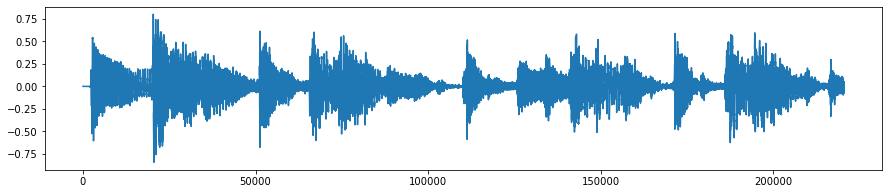

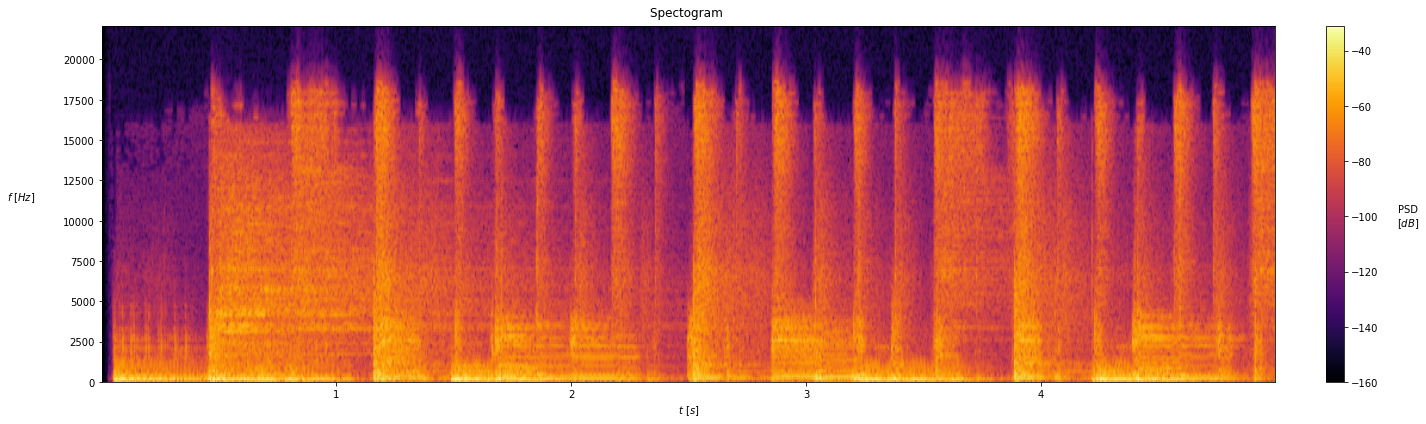

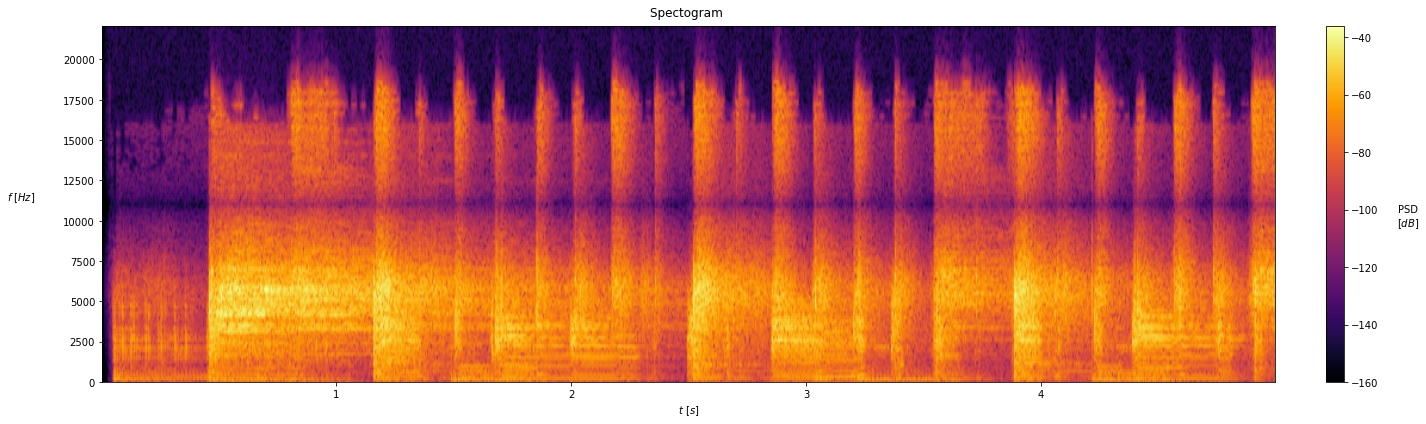

In [2]:
# >>>>>>>>>>>>>>>>> #demo_filtering <<<<<<<<<<<<<<<<<<<<<<<<<
s, Fs = sf.read('music.wav')    # stereo, select only 8 secs ... 
s = s[0:5*Fs]
display(Audio(s, rate=Fs))
plt.figure(figsize=(15,3))
plt.plot(s)
freq, time, sgr = spectrogram(s, Fs)
plot_spectrogram(freq, time, sgr)  
ss = lfilter (B,A,s)
display(Audio(ss, rate=Fs))
freq, time, sgr = spectrogram(ss, Fs)
plot_spectrogram(freq, time, sgr)  


<StemContainer object of 3 artists>

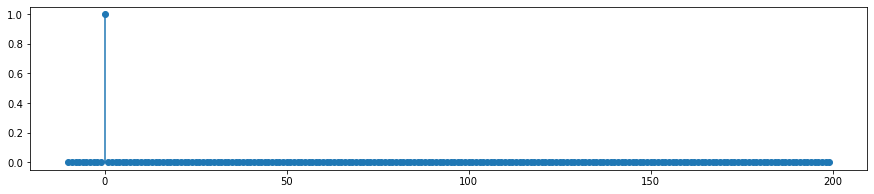

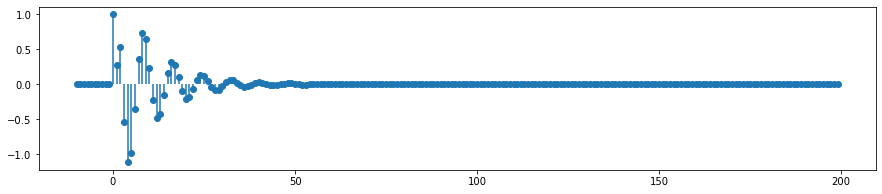

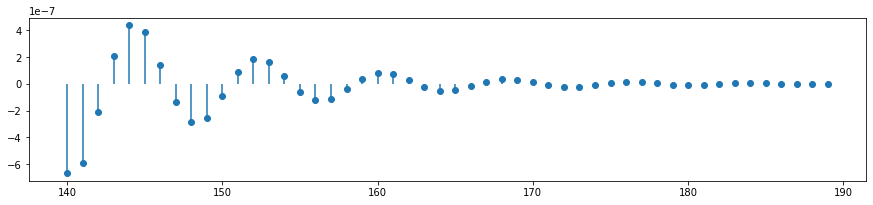

In [3]:
# >>>>>>>>>>>>>>>>> #iir_response <<<<<<<<<<<<<<<<<<<<<<<<<
n = np.arange(-10,200)
delta = np.zeros(n.shape)
delta[n==0] = 1
plt.figure(figsize=(15,3))
plt.stem(n,delta,basefmt=" ", use_line_collection="true")
h = lfilter(B,A,delta)
plt.figure(figsize=(15,3))
plt.stem(n,h,basefmt=" ", use_line_collection="true")
# zoom samples 150-200
plt.figure(figsize=(15,3))
plt.stem(n[150:200],h[150:200],basefmt=" ", use_line_collection="true")

Text(0.5, 0, '$omega$')

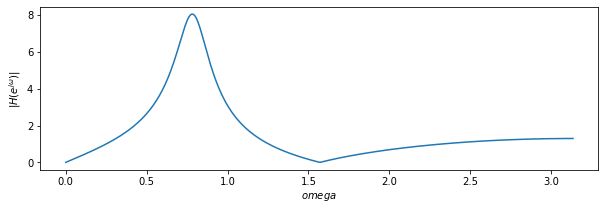

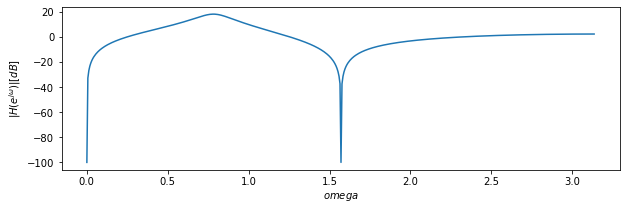

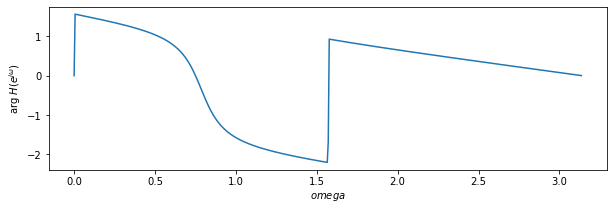

In [4]:
# >>>>>>>>>>>>>>>>> #freqz <<<<<<<<<<<<<<<<<<<<<<<<<
w, H = freqz(B, A)
# magnitude 
plt.figure(figsize=(10,3))
plt.plot(w, np.abs(H))
plt.gca().set_ylabel('$|H(e^{j\omega})|$')
plt.gca().set_xlabel('$omega$')
# magnitude in dB 
Hdb = 10* np.log10 (np.real(H * np.conj(H)) + 1e-10)
plt.figure(figsize=(10,3))
plt.plot(w, Hdb)
plt.gca().set_ylabel('$|H(e^{j\omega})| [dB]$')
plt.gca().set_xlabel('$omega$')
# phase 
plt.figure(figsize=(10,3))
plt.plot(w, np.angle(H))
plt.gca().set_ylabel('arg $H(e^{j\omega})$')
plt.gca().set_xlabel('$omega$')

Text(0.5, 0, '$f$')

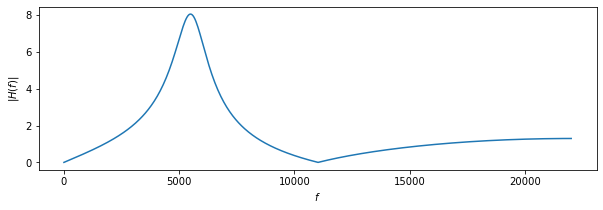

In [5]:
# magnitude - frequency axis in Hz
f = w / 2 / np.pi * Fs
plt.figure(figsize=(10,3))
plt.plot(f, np.abs(H))
plt.gca().set_ylabel('$|H(f)|$')
plt.gca().set_xlabel('$f$')

In [6]:
# >>>>>>>>>>>>>>>>> #roots <<<<<<<<<<<<<<<<<<<<<<<<<
polynomial = [1,2,1]
print(np.roots(polynomial))
polynomial = [1,-2,2]
print(np.roots(polynomial))

[-1.+6.68896751e-09j -1.-6.68896751e-09j]
[1.+1.j 1.-1.j]


In [7]:
# >>>>>>>>>>>>>>>>> #roots_our_filter <<<<<<<<<<<<<<<<<<<<<<<<<
ns = np.roots(B)
print(ns)
ps = np.roots(A)
print(ps)
print(np.abs(ps), np.angle(ps))

[1.00000000e+00+0.j 7.53884232e-17+1.j 7.53884232e-17-1.j]
[0.6363961+0.6363961j 0.6363961-0.6363961j]
[0.9 0.9] [ 0.78539816 -0.78539816]


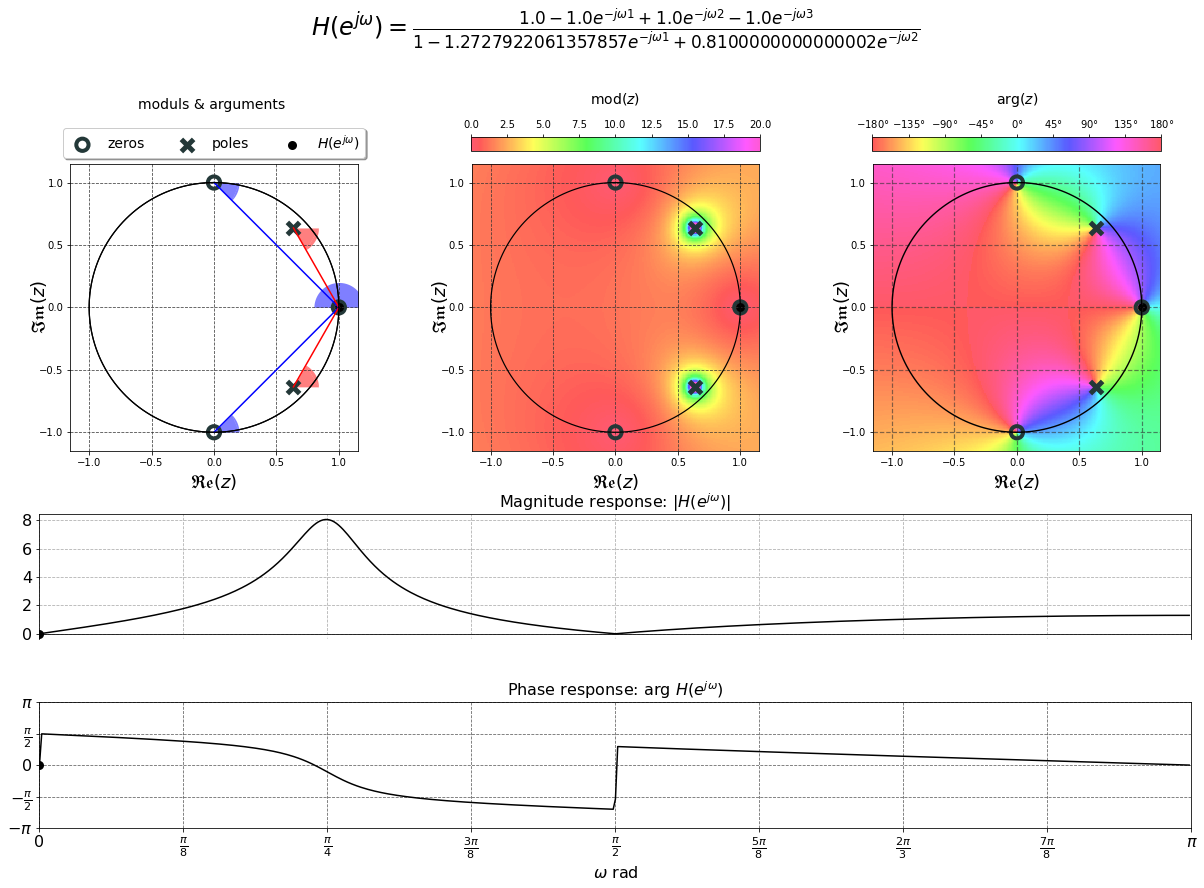

In [8]:
# >>>>>>>>>>>>>>>>> #zeros_poles_to_freq_response <<<<<<<<<<<<<<<<<<<<<<<<<
# demos by Petr Palka ! 
filter = myFilter(B, A)
filter.demo(0)

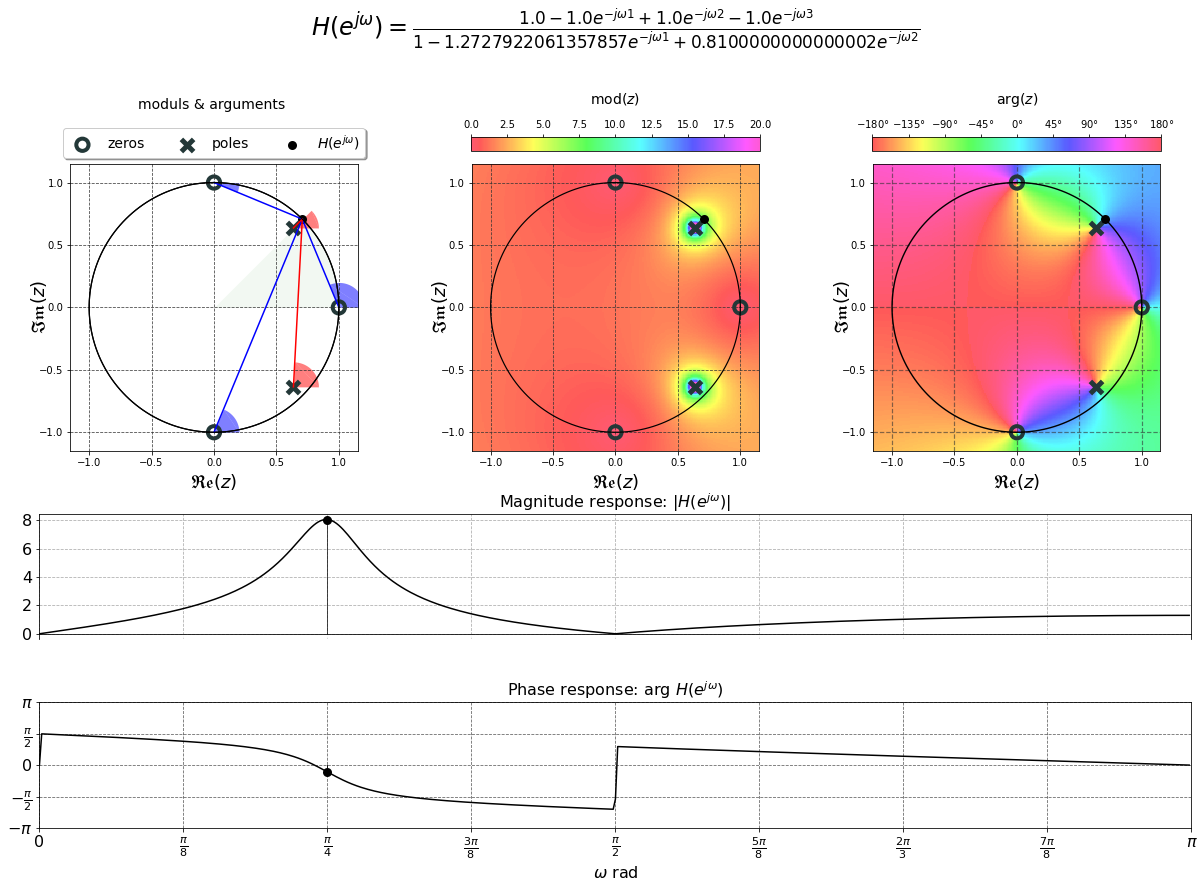

In [9]:
filter.demo(np.pi / 4)

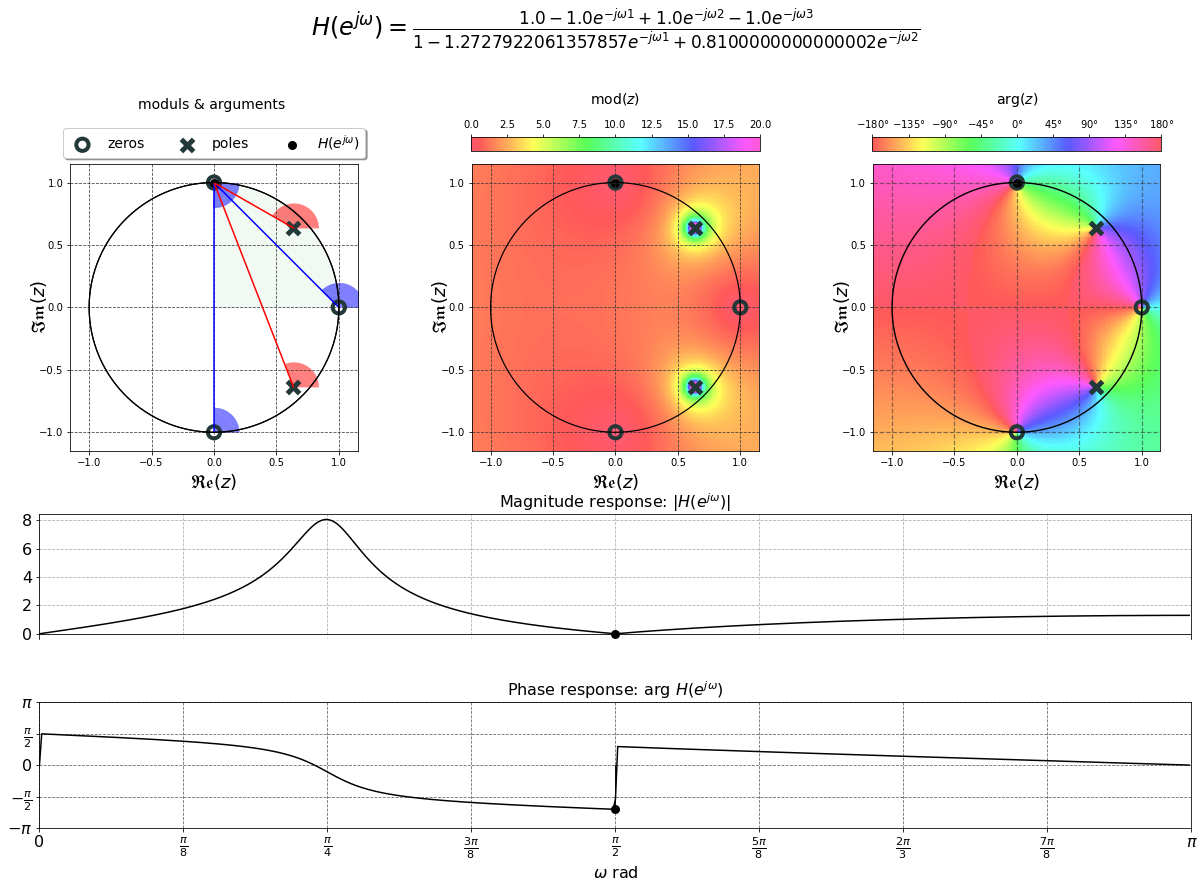

In [10]:
filter.demo(np.pi / 2)

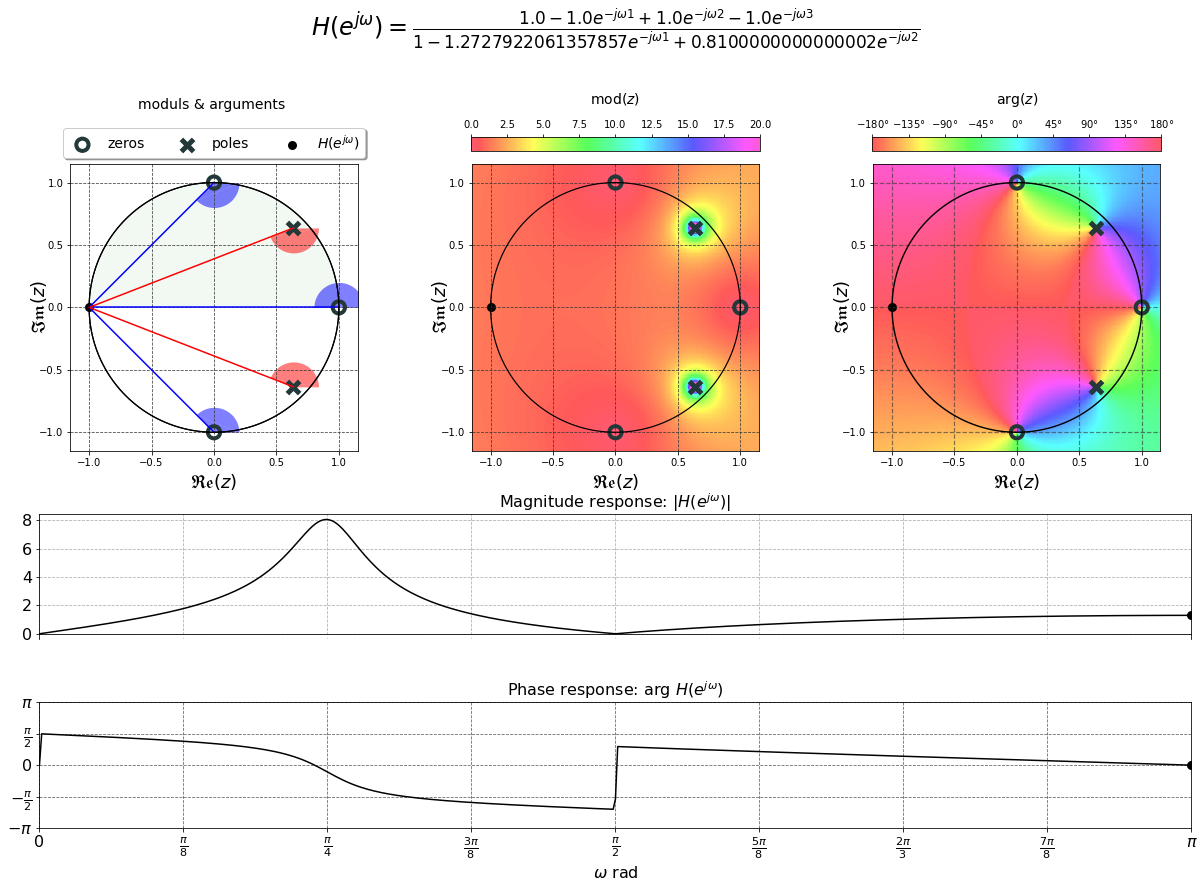

In [11]:
filter.demo(np.pi )

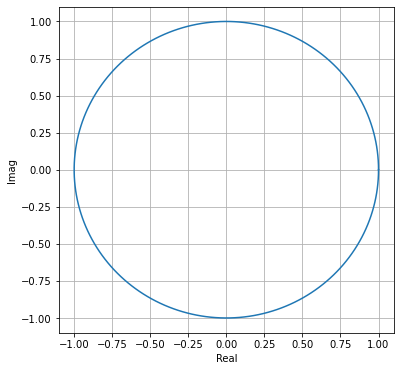

In [12]:
# need unit circle ... 
om = np.linspace(0,2 * np.pi,200)
unit = np.exp(1j * om)
plt.figure(figsize=(6,6))
plt.plot(np.real(unit), np.imag(unit))
plt.gca().set_ylabel('Imag')
plt.gca().set_xlabel('Real')
plt.gca().grid()